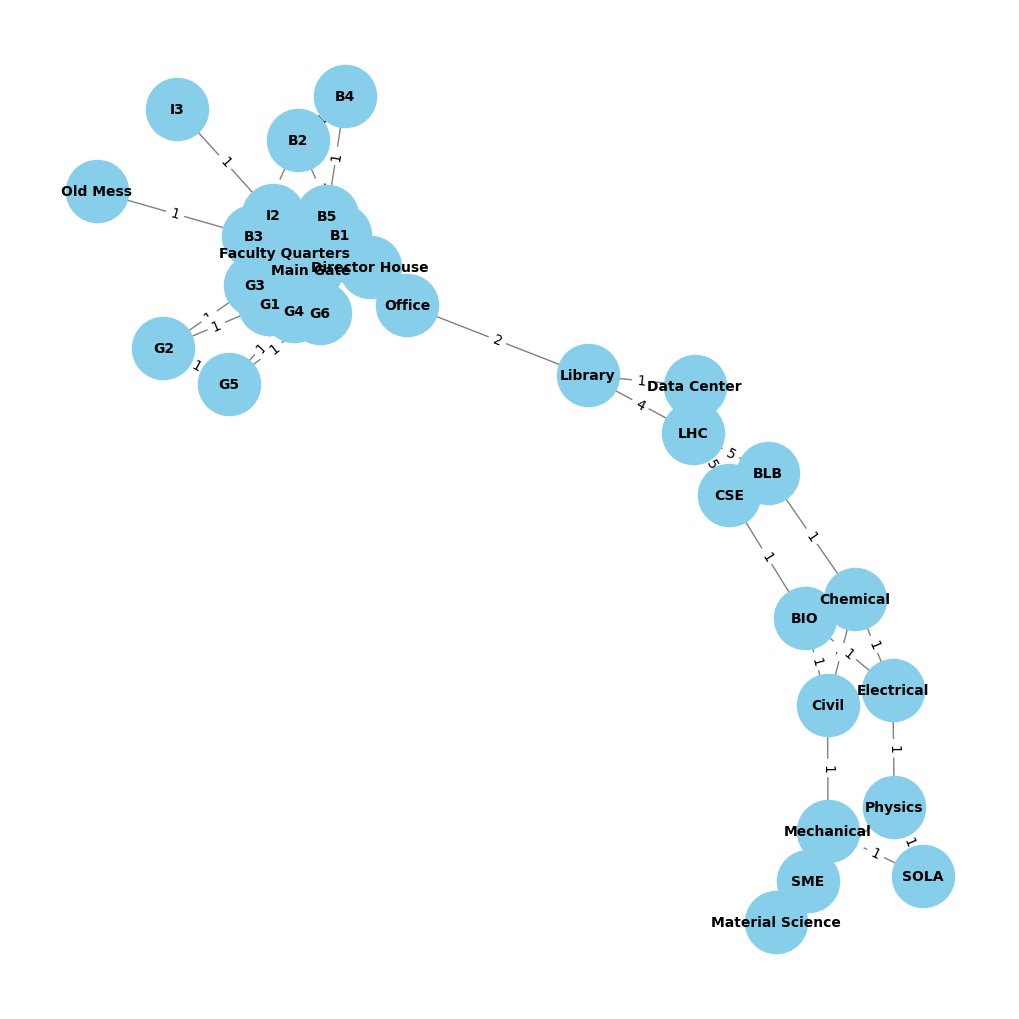

Main Gate: [-0.29811938  0.30887139]
Office: [-0.14915566  0.23881457]
I2: [-0.35747099  0.4191462 ]
B1: [-0.25302061  0.38033571]
B3: [-0.38804534  0.37688447]
B5: [-0.27382679  0.41757981]
G4: [-0.32559435  0.22696343]
G3: [-0.38587209  0.27993384]
G1: [-0.36329182  0.24173431]
G6: [-0.28434366  0.22257765]
Director House: [-0.20736577  0.31507637]
Faculty Quarters: [-0.34067168  0.34240735]
Library: [0.13143398 0.0975003 ]
Data Center: [0.29819516 0.07644022]
LHC: [ 0.29617103 -0.01795541]
BLB: [ 0.41233704 -0.09910461]
CSE: [ 0.35144642 -0.14237751]
Chemical: [ 0.5477713  -0.35118906]
BIO: [ 0.46906412 -0.38839066]
Electrical: [ 0.60615242 -0.53309174]
Civil: [ 0.50462355 -0.56410368]
Physics: [ 0.60855009 -0.76856885]
Mechanical: [ 0.5055292  -0.81649783]
SOLA: [ 0.65348203 -0.90789326]
Material Science: [ 0.42508241 -1.        ]
SME: [ 0.47382237 -0.91679483]
I3: [-0.50680349  0.63241713]
B2: [-0.3182642   0.57083253]
B4: [-0.2452285   0.65882928]
Old Mess: [-0.631729    0.466809

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency list as a graph
graph_data = {
    'Main Gate': {'Office': 10, 'I2': 10, 'B1': 12, 'B3': 13, 'B5': 12, 'G4': 13, 'G3': 13, 'G1': 14, 'G6': 14, 'Director House': 9, 'Faculty Quarters': 13},
    'Office': {'Main Gate': 10, 'Library': 2},
    'Library': {'Office': 2, 'Data Center': 1, 'LHC': 4},
    'Data Center': {'Library': 1, 'LHC': 4},
    'LHC': {'Data Center': 4, 'Library': 4, 'BLB': 5, 'CSE': 5},
    'BLB': {'LHC': 5, 'Chemical': 1},
    'CSE': {'LHC': 5, 'BIO': 1},
    'BIO': {'CSE': 1, 'Electrical': 1, 'Civil': 1},
    'Chemical': {'BLB': 1, 'Electrical': 1, 'Civil': 1},
    'Electrical': {'BIO': 1, 'Physics': 1, 'Chemical': 1},
    'Civil': {'BIO': 1, 'Chemical': 1, 'Mechanical': 1},
    'Mechanical': {'Civil': 1, 'SOLA': 1, 'Material Science': 1},
    'Physics': {'Electrical': 1, 'SOLA': 1, 'SME': 1},
    'SOLA': {'Physics': 1, 'Mechanical': 1},
    'SME': {'Physics': 1, 'Material Science': 1},
    'Material Science': {'Mechanical': 1, 'SME': 1},
    'I2': {'Main Gate': 10, 'I3': 1},
    'I3': {'I2': 1},
    'B1': {'Main Gate': 12, 'B2': 1, 'B5': 1},
    'B2': {'B1': 1, 'B3': 1, 'B4': 1},
    'B3': {'B2': 1, 'Old Mess': 1, 'Main Gate': 13},
    'B4': {'B5': 1, 'B2': 1},
    'B5': {'Main Gate': 12, 'B4': 1, 'B1': 1},
    'Old Mess': {'B3': 1},
    'G1': {'G2': 1, 'G6': 1, 'Main Gate': 14},
    'G2': {'G3': 1, 'G1': 1, 'G5': 1},
    'G3': {'Main Gate': 13, 'G2': 1, 'G4': 1},
    'G4': {'Main Gate': 13, 'G5': 1, 'G3': 1},
    'G5': {'G4': 1, 'G6': 1, 'G2': 1},
    'G6': {'G5': 1, 'G1': 1, 'Main Gate': 14},
    'Director House': {'Main Gate': 9},
    'Faculty Quarters': {'Main Gate': 13}
}

# Create a graph using NetworkX
G = nx.Graph()

# Add edges to the graph
for node, neighbors in graph_data.items():
    for neighbor, distance in neighbors.items():
        G.add_edge(node, neighbor, weight=distance)

# Use a spring layout to compute x and y coordinates
pos = nx.spring_layout(G, weight='weight')

# Display the graph with node positions
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Print out the coordinates of each node
for node, coordinates in pos.items():
    print(f"{node}: {coordinates}")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from building import Building

class CampusMap:
    def _init_(self):
        self.graph = nx.Graph()  

    def add_location(self, building):
        self.graph.add_node(building)

    def add_path(self, from_location, to_location, weight=1):
        """
        Add a path between two locations with a specified weight.
        Weight can represent distance, time, or any other metric.
        """
        self.graph.add_edge(from_location, to_location, weight=weight)

    def visualize_map(self):
        pos = nx.spring_layout(self.graph)
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')

        # Draw the main campus map
        nx.draw(self.graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_color='red')

        plt.show()

    def get_adjacency_list(self):
        """
        Returns the adjacency list of the campus graph as a dictionary.
        Each key is a node, and the corresponding value is a dictionary
        of neighboring nodes and their edge weights.
        """
        adjacency_list = {}
        for node in list(self.graph.nodes):
            adjacency_list[node[0].name] = {}
            for neighbor in self.graph.neighbors(node):
                adjacency_list[node[0].name][neighbor[0].name] = self.graph[node][neighbor]['weight']
        
        return adjacency_list


if _name_ == "_main_":
    campus_map = CampusMap()

    main_gate = Building("Main Gate", "gate"),
    office = Building("Office", "dept"),
    library = Building("Library", "dept"),
    data_center = Building("Data Center", "dept"),
    lhc = Building("LHC", "dept"),
    blb = Building("BLB", "dept"),
    cse_dept = Building("CSE", "dept"),
    bio_dept = Building("BIO", "dept"),
    chemical_dept = Building("Chemical", "dept"),
    electrical_dept = Building("Electrical", "dept"),
    civil_dept = Building("Civil", "dept"),
    mechanical_dept = Building("Mechanical", "dept"),
    physics_dept = Building("Physics", "dept"),
    sola = Building("SOLA", "dept"),
    sme = Building("SME", "dept"),
    material_dept = Building("Material Science", "dept"),
    I2 = Building("I2", "hostel"),
    I3 = Building("I3", "hostel"),
    B1 = Building("B1", "hostel"),
    B2 = Building("B2", "hostel"),
    B3 = Building("B3", "hostel"),
    B4 = Building("B4", "hostel"),
    B5 = Building("B5", "hostel"),
    old_mess = Building("Old Mess", "dept"),
    G1 = Building("G1", "hostel"),
    G2 = Building("G2", "hostel"),
    G3 = Building("G3", "hostel"),
    G4 = Building("G4", "hostel"),
    G5 = Building("G5", "hostel"),
    G6 = Building("G6", "hostel"),
    director_house = Building("Director House", "house"),
    faculty_quarters = Building("Faculty Quarters", "hostel"),

    campus_map.add_location(main_gate)
    campus_map.add_location(office)
    campus_map.add_location(library)
    campus_map.add_location(data_center)
    campus_map.add_location(lhc) 
    campus_map.add_location(blb)
    campus_map.add_location(cse_dept)
    campus_map.add_location(bio_dept)
    campus_map.add_location(chemical_dept)
    campus_map.add_location(electrical_dept)
    campus_map.add_location(civil_dept)
    campus_map.add_location(mechanical_dept)
    campus_map.add_location(physics_dept)
    campus_map.add_location(sola)
    campus_map.add_location(sme)
    campus_map.add_location(material_dept)
    campus_map.add_location(I2)
    campus_map.add_location(I3)
    campus_map.add_location(B1)
    campus_map.add_location(B2)
    campus_map.add_location(B3)
    campus_map.add_location(B4)
    campus_map.add_location(B5)
    campus_map.add_location(old_mess)
    campus_map.add_location(G1)
    campus_map.add_location(G2)
    campus_map.add_location(G3)
    campus_map.add_location(G4)
    campus_map.add_location(G5)
    campus_map.add_location(G6)
    campus_map.add_location(director_house)
    campus_map.add_location(faculty_quarters)

    campus_map.add_path(main_gate, office, weight=10)
    campus_map.add_path(office, library ,weight=2)
    campus_map.add_path(library, data_center, weight=1)
    campus_map.add_path(data_center, lhc, weight=4)
    campus_map.add_path(lhc, library, weight=4)
    campus_map.add_path(lhc, blb, weight=5)
    campus_map.add_path(lhc, cse_dept, weight=5)

    campus_map.add_path(cse_dept, bio_dept, weight=1)
    campus_map.add_path(blb, chemical_dept, weight=1)
    campus_map.add_path(bio_dept, electrical_dept, weight=1)
    campus_map.add_path(bio_dept, civil_dept, weight=1)
    campus_map.add_path(electrical_dept, physics_dept, weight=1)
    campus_map.add_path(physics_dept, sola, weight=1)
    campus_map.add_path(physics_dept, sme, weight=1)

    campus_map.add_path(chemical_dept, electrical_dept, weight=1)
    campus_map.add_path(chemical_dept, civil_dept, weight=1)
    campus_map.add_path(civil_dept, mechanical_dept, weight=1)
    campus_map.add_path(mechanical_dept, sola, weight=1)
    campus_map.add_path(mechanical_dept, material_dept, weight=1)
    campus_map.add_path(material_dept, sme, weight=1)

    campus_map.add_path(main_gate, I2, weight=10)
    campus_map.add_path(I2, I3, weight=1)

    campus_map.add_path(main_gate, B1, weight=12)
    campus_map.add_path(B1, B2, weight=1)
    campus_map.add_path(B2, B3, weight=1)
    campus_map.add_path(B3, old_mess, weight=1)
    campus_map.add_path(main_gate, B3, weight=13)
    campus_map.add_path(main_gate, B5, weight=12)
    campus_map.add_path(B5, B4, weight=1)
    campus_map.add_path(B1, B5, weight=1)
    campus_map.add_path(B2, B4, weight=1)

    campus_map.add_path(main_gate, G4, weight=13)
    campus_map.add_path(G4, G5, weight=1)
    campus_map.add_path(G5, G6, weight=1)
    campus_map.add_path(main_gate, G3, weight=13)
    campus_map.add_path(G3, G2, weight=1)
    campus_map.add_path(G2, G1, weight=1)
    campus_map.add_path(G4, G3, weight=1)
    campus_map.add_path(G5, G2, weight=1)
    campus_map.add_path(G6, G1, weight=1)
    
    campus_map.add_path(main_gate, G1, weight=14)
    campus_map.add_path(main_gate, G6, weight=14)
    campus_map.add_path(main_gate, director_house, weight=9)
    campus_map.add_path(main_gate, faculty_quarters, weight=13)

    print(campus_map.get_adjacency_list())